<a href="https://colab.research.google.com/github/Fadora/diplomatervezes2024/blob/main/PreprocessMRI_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"drafbin","key":"996fb26f38991862b6f5042a92223973"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation


100% 712M/714M [00:18<00:00, 30.6MB/s]
100% 714M/714M [00:18<00:00, 40.0MB/s]


In [ ]:
!unzip lgg-mri-segmentation.zip


Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [ ]:
import matplotlib.pyplot as plt  #képek, gráfok ábrázolása miatt
import numpy as np
import glob                      #hogy az adatbázis minden útvonalát elérjük
import cv2                       #képről specifikus adat, pl diagnozis, vagy a kép olvasása
import pandas as pd              #a dataframe minden útvonalát lássuk

In [ ]:
root_path = '/content/lgg-mri-segmentation/kaggle_3m/'    #a root úvonala a felvételeknek és maszkoknak
potential_mask_files = glob.glob(root_path + "*/*_mask*") # azon fileok kigyújtése, melyekben szerepel a "mask", ezek a potenciális maszkokat rejtő fileok
mask_files = []
add_count = 0
for mask in potential_mask_files:
  if np.max(cv2.imread(mask)) > 0:
    mask_files.append(mask)     #ha van tumor, mert van 0-tól eltérő RGB a pixelen, akkor van maszk, van tumor
  elif np.max(cv2.imread(mask)) == 0 and add_count % 3 == 0:  # az üres maszkok közül minden 3.-at adjuk a maszkok listájához
    mask_files.append(mask)

  add_count += 1

In [ ]:
image_files = []      # a felvételek neve ugyanaz, mint a maszkoké csak a "_mask" utótag nélkül.
for mask in mask_files:
  rmask = mask.replace("_mask", "")
  image_files.append(rmask)

In [ ]:
tumour_count = []
def diagnosis(mask_path):
    if np.max(cv2.imread(mask_path)) > 0:
      tumour_count.append("1")
      return 1
    else:
      tumour_count.append("0")
      return 0

files_df = pd.DataFrame({"image_path": image_files,
                         "mask_path": mask_files,
                         "diagnosis": [diagnosis(x) for x in mask_files]})

print(files_df)

                                             image_path  \
0     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
1     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
3     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
4     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
...                                                 ...   
2217  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2218  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2219  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2220  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2221  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   

                                              mask_path  diagnosis  
0     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          0  
1     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          1  
2     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          1  
3     /content/

<BarContainer object of 2 artists>

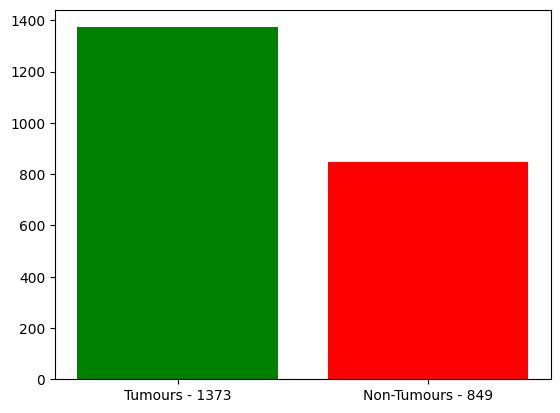

In [ ]:
n_tumours = tumour_count.count("1")
n_nontumours = tumour_count.count("0")
plt.bar(["Tumours - " + str(n_tumours), "Non-Tumours - " + str(n_nontumours)], [n_tumours, n_nontumours], color=["green", "red"])

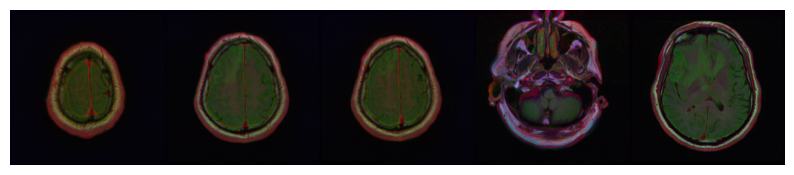

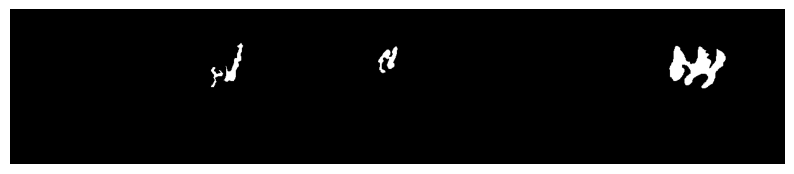

In [ ]:
#a felvételek első 5 elemét vizualizáluk egy sorban
plt.figure(figsize=(10, 10))
for i in range(len(image_files[:5])):
  plt.subplot(1, 5, i+1)
  image = cv2.imread(image_files[i])
  plt.imshow(image)
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

#a maszkok első 10 elemét vizualizáluk egy sorban, amik a fenti felvételekhez tartoznak.
plt.figure(figsize=(10, 10))
for i in range(len(mask_files[:5])):
  plt.subplot(2, 5, i+1)
  mask = cv2.imread(mask_files[i])
  plt.imshow(mask)
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

<class 'numpy.ndarray'>


<ipython-input-20-2d441df56b56>:11: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(image_float, weight=0.001, multichannel=True)


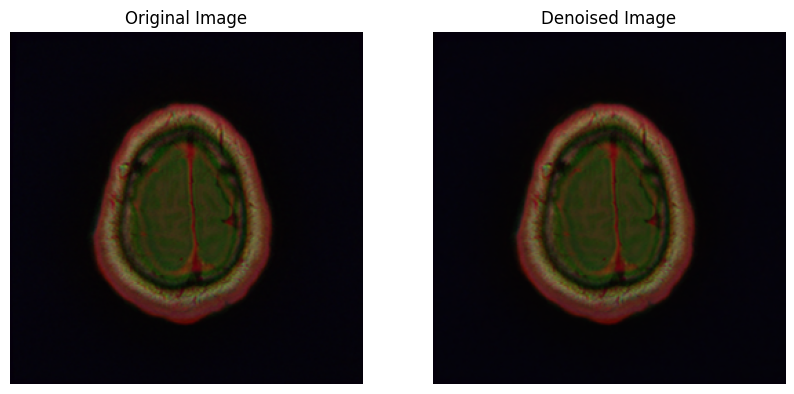

In [ ]:
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle


image = cv2.imread(image_files[0])
# Convert the image to floating-point representation
print(type(image))
image_float = img_as_float(image)

# Denoise the image using Total Variation (TV) denoising
denoised_image = denoise_tv_chambolle(image_float, weight=0.001, multichannel=True)

# Plot the original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_float, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

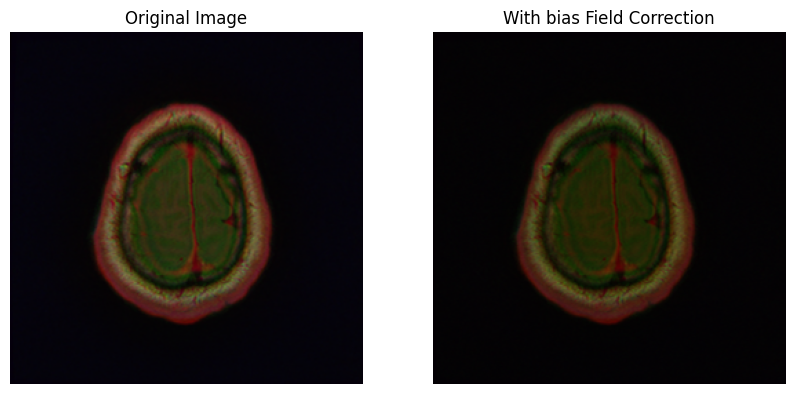

In [ ]:
!pip install SimpleITK
import SimpleITK as sitk

image = cv2.imread(image_files[0])
image = img_as_float(image)
sitk_image = sitk.GetImageFromArray(image)

# Perform bias field correction using the N4ITK algorithm
corrector = sitk.N4BiasFieldCorrectionImageFilter()
corrected_image = corrector.Execute(sitk_image)

# Convert SimpleITK image back to NumPy array
corrected_numpy_array = sitk.GetArrayFromImage(corrected_image)

# Plot the original and corrected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected_numpy_array, cmap='gray')
plt.title('With bias Field Correction')
plt.axis('off')

plt.show()

In [ ]:
import torch    #nn fejlesztés és tanítás
import torchvision    # sokféle transzformációra lesz szükség
from torchvision.transforms import transforms

In [ ]:
num_pixels = len(image_files)*256*256

total_sum = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  total_sum += image[0].sum()
mean = total_sum/num_pixels

sum_squared_error = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  sum_squared_error += ((image[0] - mean)**2).sum()
std = torch.sqrt(sum_squared_error/num_pixels)


print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor(0.0212)
Standard Deviation: tensor(1.1493)


In [ ]:
image_data = []
mask_data = []

# files are file paths, dataset is empty list that you will append the images too
def loading_data(files, dataset, actions):
  for data in files:
    # reading the image/mask
    image = cv2.imread(data) #makes it a numpy array

    # resizing the image/mask
    image = cv2.resize(image, (256, 256))


    # convert the PIL image into a PyTorch tensor, cast the int8 values to float32, normalize
    if actions == True: # images
      transform = torchvision.transforms.Compose([transforms.ToTensor(),
                                                  transforms.ConvertImageDtype(torch.float),
                                                  transforms.Normalize((mean, mean, mean), (std, std, std))])
      image = transform(image)

    elif actions == False: # masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(), transforms.ConvertImageDtype(torch.float), transforms.Grayscale()])
      image = transform(image)

    # no blurs needed because the edges need to be clear and precise

    dataset.append(image)

In [ ]:
loading_data(image_files, image_data, True)


In [ ]:
loading_data(mask_files, mask_data, False)


<class 'torch.Tensor'>


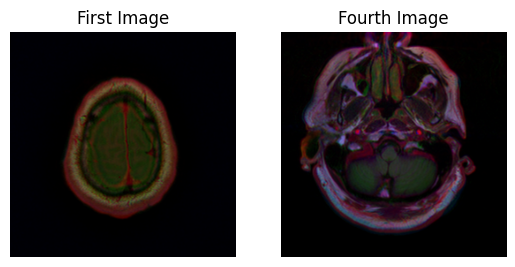

In [ ]:
plt.subplot(1, 2, 1)
print(type(image_data[0]))
tensor_image = image_data[0]
numpy_image = tensor_image.permute(1, 2, 0).detach().cpu().numpy()
plt.imshow(numpy_image)
plt.title('First Image')
plt.axis('off')

plt.subplot(1, 2, 2)
tensor_image2 = image_data[3]
numpy_image2 = tensor_image2.permute(1, 2, 0).detach().cpu().numpy()
plt.imshow(numpy_image2)
plt.title('Fourth Image')
plt.axis('off')

plt.show()

In [ ]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

# Download an example image
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to /root/.cache/torch/hub/checkpoints/unet-e012d006.pt


In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)    #megnyitjuk a képet
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),    #normalized between 0 and 1
    transforms.Normalize(mean=m, std=s),  #z-volume normalized, im doing it above as well
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
